In [ ]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import pandas as pd
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
musk = pd.read_csv('Elon_musk.csv', encoding = 'latin1', error_bad_lines = False)
musk = musk.drop('Unnamed: 0', axis = 1)
musk

C:\Users\HP\AppData\Local\Temp\ipykernel_10000\2077940265.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  musk = pd.read_csv('Elon_musk.csv', encoding = 'latin1', error_bad_lines = False)


,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
list = []
for x in musk.Text:
    a = x.strip()
    list.append(a)
    
list = [x for x in list if x]
    
list

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
text = ' '.join(list)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
text = text.translate(str.maketrans('', '', string.punctuation))
text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [ ]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
tokens

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

stop_words = stopwords.words('english')
tokens = [word for word in tokens if not word in stop_words]
tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'JoshManMode',
 'He',
 'definitely',
 'issues',
 'se

In [ ]:
normal_tokens= []
for x in tokens:
    x.lower()
    normal_tokens.append(x)
normal_tokens

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'JoshManMode',
 'He',
 'definitely',
 'issues',
 'se

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in normal_tokens]
stemmed_tokens

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'joerogan',
 'spotifi',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestim',
 'teslacn',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'owenspark',
 'flcnhvi',
 'anonyx10',
 'haha',
 'thank',
 'flcnhvi',
 'anonyx10',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'givedirectli',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'kanyewest',
 'httpstco3rwe9uhst',
 'geoffkeighley',
 'unrealengin',
 'it\x92',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmod',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'freewalletorg',
 'than

In [ ]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(tokens))
doc

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine Its getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha httpstcoFc9uhQSd7O freewalletorg Any crypto wallet wont give private keys avoided costs freewalletorg Your app sucks RT SpaceX NASA selected Falcon Heavy launch first two elements lunar Gateway togeth

In [ ]:
lemmas = [token.lemma_ for token in doc]
lemmas

['kunalb11',
 'i\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'try',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'Doge',
 'underestimate',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thank',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'just',
 'send',
 'just',
 'agree',
 'Clubhouse',
 'kanyew',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'get',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'JoshManMode',
 'he',
 'definitely',
 'issue',
 'sentencing',
 's

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
vectorizer.vocabulary_

{'kunalb11': 2712,
 'alien': 232,
 'idaacarmack': 2449,
 'ray': 3627,
 'trace': 4508,
 'cyberpunk': 968,
 'hdr': 1686,
 'nextlevel': 3164,
 'have': 1680,
 'try': 4544,
 'joerogan': 2632,
 'spotify': 4125,
 'great': 1620,
 'interview': 2560,
 'gtera27': 1639,
 'doge': 1121,
 'underestimate': 4677,
 'teslacn': 4353,
 'congratulations': 863,
 'tesla': 4347,
 'china': 746,
 'amazing': 258,
 'execution': 1335,
 'last': 2731,
 'year': 4949,
 'now': 3204,
 'next': 3163,
 'even': 1307,
 'happy': 1667,
 'new': 3160,
 'ox': 3320,
 'httpstco9wfkmyu2oj': 1875,
 'frodo': 1503,
 'underdoge': 4676,
 'all': 235,
 'thought': 4432,
 'would': 4925,
 'fail': 1371,
 'himself': 1730,
 'httpstcozgxjfdzzrm': 2408,
 'owensparks': 3317,
 'flcnhvy': 1445,
 'anonyx10': 287,
 'haha': 1653,
 'thank': 4390,
 'indeed': 2498,
 'tweets': 4567,
 'definitely': 1023,
 'represent': 3711,
 'realworld': 3652,
 'time': 4451,
 'allocation': 237,
 'the': 4398,
 'entertaining': 1263,
 'outcome': 3296,
 'likely': 2792,
 'givedire

In [ ]:
feature_names = vectorizer.get_feature_names()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
dense = X.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [ ]:
with open('negative-words.txt','r') as positive:
    negetive_words = positive.read().split('\n')

In [ ]:
with open('positive-words.txt','r') as negetive:
    positive_words = negetive.read().split('\n')

In [ ]:
df

,005,10,100,1000,10000,107,10x,11,112,11thhour,...,zikryzamir,zip2,zogfotpik,zon,zone,zshauladventure,zubinanary,zwiebelbach,zzcool,ðogecoin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
txt_neg_in_nw = ' '.join([word for word in df if word in negetive_words])
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

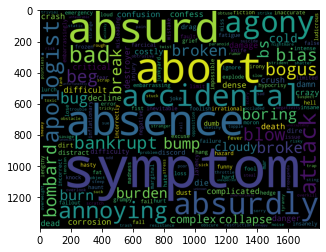

In [ ]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)
plt.imshow(wordcloud_neg)

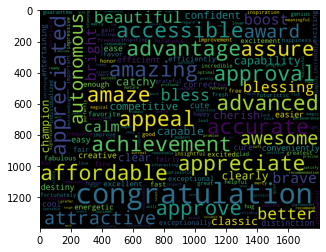

In [ ]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)
plt.imshow(wordcloud_pos)